**Studi Kasus: Analisis Kelayakan Investasi Rumah Sewa dengan Simulasi Monte Carlo**

Proyek ini menganalisis kelayakan investasi pembangunan tiga unit rumah sewa dengan modal awal Rp434 juta (termasuk tanah yang telah dibeli sebelumnya). Studi kasus ini menggunakan pendekatan simulasi Monte Carlo untuk mengukur risiko dan potensi keuntungan dengan mempertimbangkan berbagai ketidakpastian pasar. Fokus utama analisis adalah:

Skenario Kenaikan Sewa: Harga sewa diasumsikan naik tetap Rp100.000 per unit setiap 3 tahun (dari harga awal Rp1,5 juta/unit/bulan).

Variabel Kunci yang Diuji:

*   Tingkat kekosongan (5-15%)
*   Biaya operasional (5-10% dari pendapatan)
*   Suku bunga deposito (5-7% sebagai benchmark)

Metrik Utama:

*   **NPV** untuk mengukur profitabilitas absolut
*   **IRR** sebagai tolok ukur efisiensi investasi
*   **Payback Period** untuk menilai jangka waktu pengembalian modal

Pendekatan Realistis:

*   Simulasi dijalankan 1.000 kali untuk mencakup berbagai skenario
*   Menghitung probabilitas proyek layak (NPV > 0)
*   Visualisasi distribusi hasil untuk pemahaman risiko


=== Hasil Simulasi Monte Carlo ===
Rata-rata NPV: Rp 51,491,841.61
Standar Deviasi NPV: Rp 26,670,170.02
Probabilitas Proyek Layak: 98.60%
Rata-rata IRR: 0.0766 atau 7.66%
Standar Deviasi IRR: 0.0055

=== Analisis Payback Period ===
Rata-rata Payback Period: 9.0 tahun
Standar Deviasi: 0.3 tahun
Probabilitas Payback ≤ 10 tahun: 100.0%


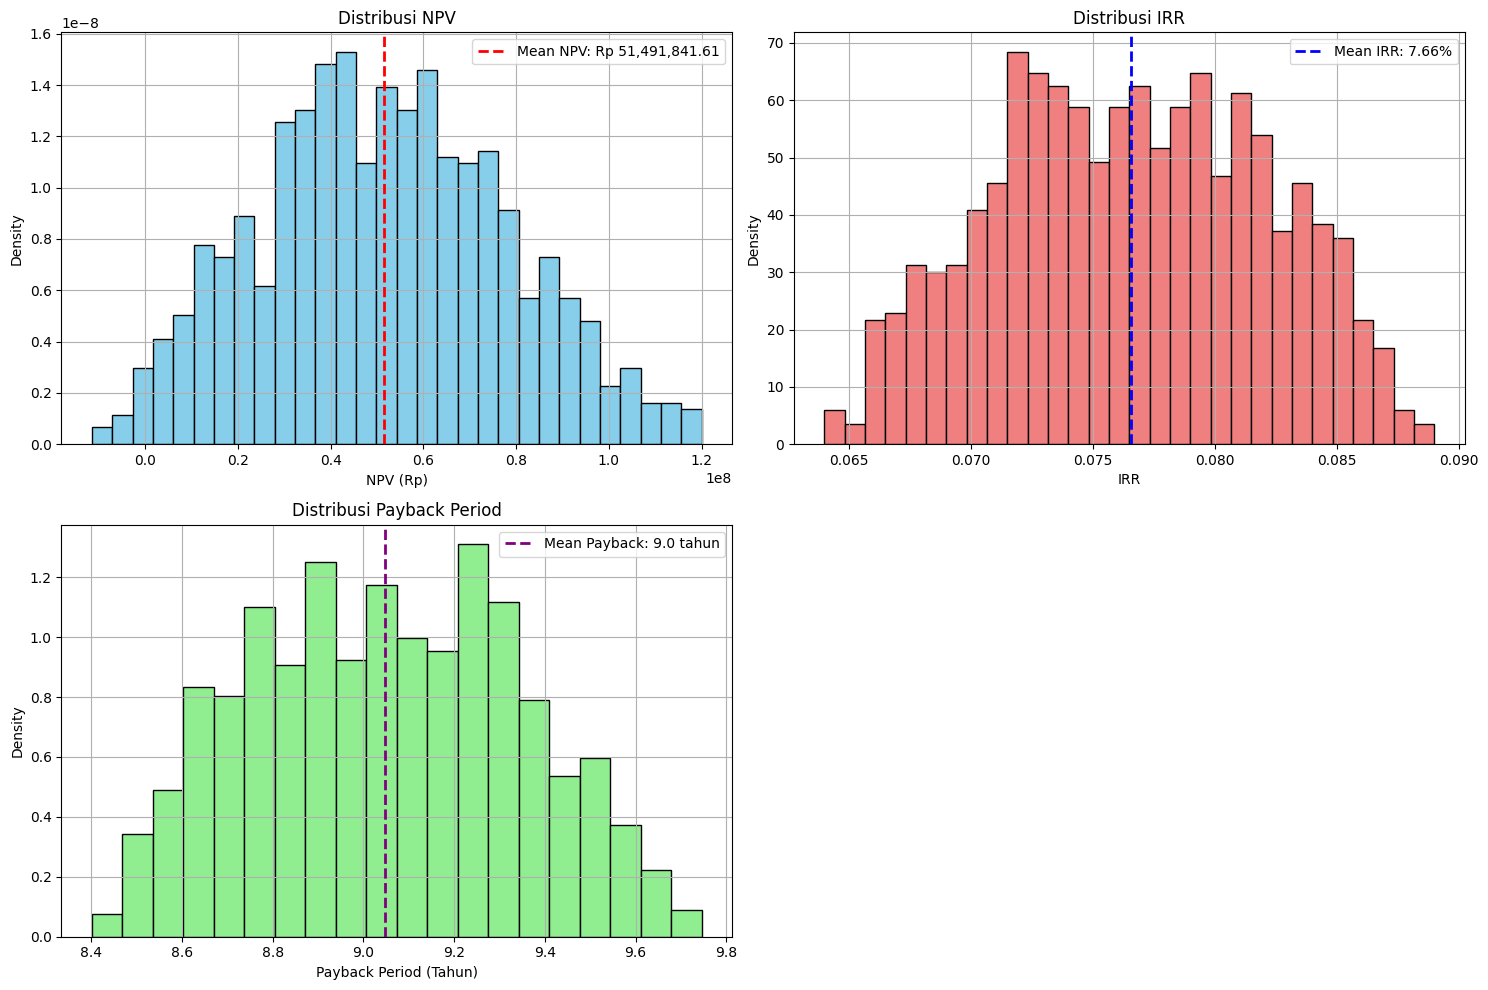


=== Contoh 5 Skenario Acak ===
   NPV (Rp)  IRR (%)  Payback (thn)  Suku Bunga (%)  Vacancy Rate (%)  Biaya Operasional (%)
43772329.24     6.78           9.52            6.09              7.41                   7.59
36520259.76     7.66           9.04            6.09              7.41                   7.59
64504666.91     8.41           8.65            6.09              7.41                   7.59
16966373.02     7.55           9.10            6.09              7.41                   7.59
65107973.69     7.44           9.16            6.09              7.41                   7.59


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Input dasar (fixed)
modal_awal = 434000000  # Rp434 juta
harga_sewa_awal = 1500000  # Rp1,5 juta/unit/bulan
jumlah_unit = 3
periode = 15  # tahun
n_iterations = 1000  # jumlah simulasi Monte Carlo
kenaikan_per_3tahun = 100000  # Rp100.000 per unit setiap 3 tahun

# Inisialisasi array untuk menyimpan hasil
cash_flow = np.zeros((n_iterations, periode))
npv_values = []
irr_values = []
payback_periods = []

# Fungsi untuk menghitung Payback Period
def calculate_payback(cash_flows, initial_investment):
    cumulative = 0
    for year, cf in enumerate(cash_flows):
        cumulative += cf
        if cumulative >= initial_investment:
            return year + (initial_investment - (cumulative - cf)) / cf
    return periode  # Jika tidak mencapai payback dalam periode analisis

# Simulasi Monte Carlo
for i in range(n_iterations):
    # Variabel acak
    suku_bunga = np.random.uniform(0.05, 0.07)  # Bunga deposito 5-7%
    vacancy_rate = np.random.uniform(0.05, 0.15)  # Kekosongan 5-15%
    biaya_operasional = np.random.uniform(0.05, 0.10)  # Biaya operasional 5-10%

    # Proyeksi arus kas dengan kenaikan tetap per 3 tahun
    harga_sewa_per_unit = harga_sewa_awal  # Rp1,5 juta/unit/bulan
    arus_kas_tahunan = []

    for tahun in range(periode):
        # Kenaikan sewa setiap 3 tahun (tahun ke-3, 6, 9, dst.)
        if tahun > 0 and tahun % 3 == 0:
            harga_sewa_per_unit += kenaikan_per_3tahun

        # Hitung pendapatan tahunan
        pendapatan_kotor = harga_sewa_per_unit * jumlah_unit * 12 * (1 - vacancy_rate)
        biaya = pendapatan_kotor * biaya_operasional
        arus_kas_tahunan.append(pendapatan_kotor - biaya)

    cash_flow[i, :] = arus_kas_tahunan

    # Menghitung NPV
    discount_factors = (1 + suku_bunga) ** np.arange(1, periode+1)
    npv = np.sum(cash_flow[i, :] / discount_factors) - modal_awal
    npv_values.append(npv)

    # Menghitung IRR
    cash_flows = [-modal_awal] + list(cash_flow[i, :])
    def irr_function(r):
        return np.sum([cf / (1 + r) ** t for t, cf in enumerate(cash_flows)])
    try:
        irr_solution = fsolve(irr_function, 0.1)[0]
        irr_values.append(irr_solution)
    except:
        irr_values.append(np.nan)

    # Menghitung Payback Period
    payback_periods.append(calculate_payback(arus_kas_tahunan, modal_awal))

# Konversi ke numpy array
npv_values = np.array(npv_values)
irr_values = np.array(irr_values)
payback_periods = np.array(payback_periods)

# Hapus nilai yang tidak valid
valid_irr = irr_values[~np.isnan(irr_values)]
valid_payback = payback_periods[~np.isnan(payback_periods)]

# Statistik Hasil Simulasi
mean_npv = np.mean(npv_values)
std_npv = np.std(npv_values)
probabilitas_layak = np.sum(npv_values >= 0) / n_iterations * 100

mean_irr = np.mean(valid_irr)
std_irr = np.std(valid_irr)

mean_payback = np.mean(valid_payback)
std_payback = np.std(valid_payback)
prob_payback_under_10 = np.sum(valid_payback <= 10) / len(valid_payback) * 100

print("\n=== Hasil Simulasi Monte Carlo ===")
print(f"Rata-rata NPV: Rp {mean_npv:,.2f}")
print(f"Standar Deviasi NPV: Rp {std_npv:,.2f}")
print(f"Probabilitas Proyek Layak: {probabilitas_layak:.2f}%")
print(f"Rata-rata IRR: {mean_irr:.4f} atau {mean_irr * 100:.2f}%")
print(f"Standar Deviasi IRR: {std_irr:.4f}")
print(f"\n=== Analisis Payback Period ===")
print(f"Rata-rata Payback Period: {mean_payback:.1f} tahun")
print(f"Standar Deviasi: {std_payback:.1f} tahun")
print(f"Probabilitas Payback ≤ 10 tahun: {prob_payback_under_10:.1f}%")

# Visualisasi
plt.figure(figsize=(15, 10))

# Distribusi NPV
plt.subplot(2, 2, 1)
plt.hist(npv_values, bins=30, color='skyblue', edgecolor='black', density=True)
plt.axvline(mean_npv, color='red', linestyle='dashed', linewidth=2, label=f"Mean NPV: Rp {mean_npv:,.2f}")
plt.xlabel("NPV (Rp)")
plt.ylabel("Density")
plt.title("Distribusi NPV")
plt.legend()
plt.grid()

# Distribusi IRR
plt.subplot(2, 2, 2)
plt.hist(valid_irr, bins=30, color='lightcoral', edgecolor='black', density=True)
plt.axvline(mean_irr, color='blue', linestyle='dashed', linewidth=2, label=f"Mean IRR: {mean_irr*100:.2f}%")
plt.xlabel("IRR")
plt.ylabel("Density")
plt.title("Distribusi IRR")
plt.legend()
plt.grid()

# Distribusi Payback Period
plt.subplot(2, 2, 3)
plt.hist(valid_payback, bins=20, color='lightgreen', edgecolor='black', density=True)
plt.axvline(mean_payback, color='purple', linestyle='dashed', linewidth=2, label=f"Mean Payback: {mean_payback:.1f} tahun")
plt.xlabel("Payback Period (Tahun)")
plt.ylabel("Density")
plt.title("Distribusi Payback Period")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Tampilkan 5 skenario acak
print("\n=== Contoh 5 Skenario Acak ===")
sample_idx = np.random.choice(n_iterations, 5, replace=False)
sample_data = []
for idx in sample_idx:
    sample_data.append({
        'NPV (Rp)': npv_values[idx],
        'IRR (%)': irr_values[idx] * 100,
        'Payback (thn)': payback_periods[idx],
        'Suku Bunga (%)': suku_bunga * 100,
        'Vacancy Rate (%)': vacancy_rate * 100,
        'Biaya Operasional (%)': biaya_operasional * 100
    })
print(pd.DataFrame(sample_data).to_string(float_format="%.2f", index=False))